In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [174]:
# Cargue el conjunto de datos en un DataFrame de Pandas
df = pd.read_csv('https://raw.githubusercontent.com/Bruno-Leguiza/Proyecto-Final-de-Data-Science---Coderhouse/main/train.csv')

In [175]:
#GRAFICOS CON MATPLOTLIB

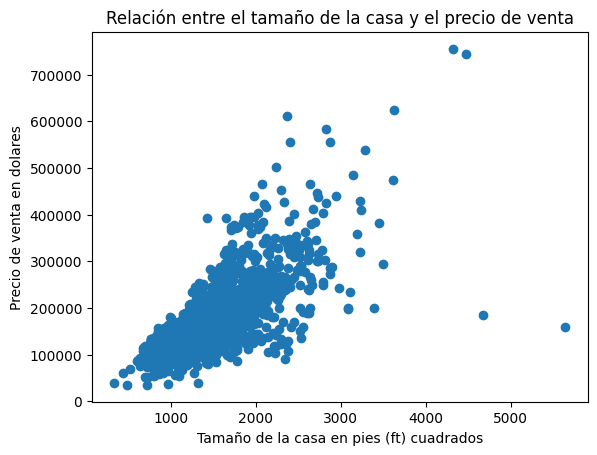

In [176]:
#Gráfico de dispersión (scatter plot) entre el precio de venta y el tamaño de la casa

plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('Tamaño de la casa en pies (ft) cuadrados')
plt.ylabel('Precio de venta en dolares')
plt.title('Relación entre el tamaño de la casa y el precio de venta')
plt.show()
#Interpretación: Este gráfico muestra la relación entre el tamaño de la casa y su precio de venta.
#Si hay una tendencia positiva en los datos, es decir, a medida que el tamaño de la casa aumenta,
#también lo hace el precio de venta, entonces podemos inferir que el tamaño de la casa es un factor importante para predecir los precios de venta.

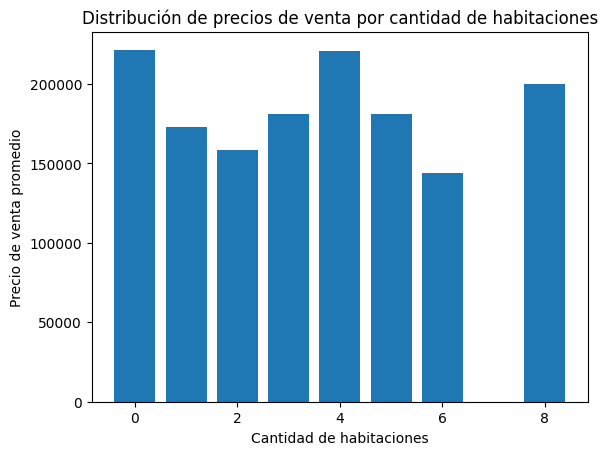

In [177]:
#Gráfico de barras (bar plot) de la distribución de los precios de venta por cantidad de habitaciones:

average_price_by_rooms = df.groupby('BedroomAbvGr')['SalePrice'].mean()
plt.bar(average_price_by_rooms.index, average_price_by_rooms)
plt.xlabel('Cantidad de habitaciones')
plt.ylabel('Precio de venta promedio')
plt.title('Distribución de precios de venta por cantidad de habitaciones')
plt.show()

#Interpretación: Este gráfico muestra la distribución de los precios de venta promedio según la cantidad de habitaciones.
#Si observamos que los precios de venta promedio aumentan significativamente a medida que aumenta la cantidad de habitaciones,
#podemos concluir que el número de habitaciones es un factor relevante para predecir los precios de venta.

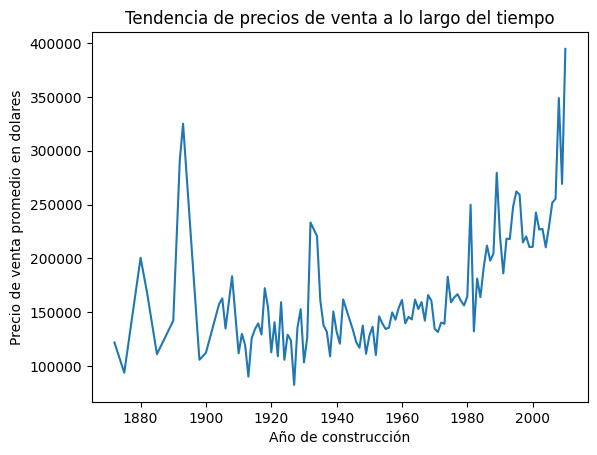

In [178]:
#Gráfico de líneas (line plot) de la tendencia de precios de venta a lo largo del tiempo:
average_price_by_year = df.groupby(df['YearBuilt'])['SalePrice'].mean()
plt.plot(average_price_by_year.index, average_price_by_year)
plt.xlabel('Año de construcción')
plt.ylabel('Precio de venta promedio en dolares')
plt.title('Tendencia de precios de venta a lo largo del tiempo')
plt.show()

#Interpretación: Este gráfico muestra la tendencia de los precios de venta promedio de las casas a lo largo del tiempo.
#Si observamos una tendencia creciente, podemos inferir que los precios de venta han aumentado con el tiempo.
#Esto puede ser útil para predecir futuros precios de venta basados en la evolución histórica.

In [179]:
#GRAFICOS CON SEABORN

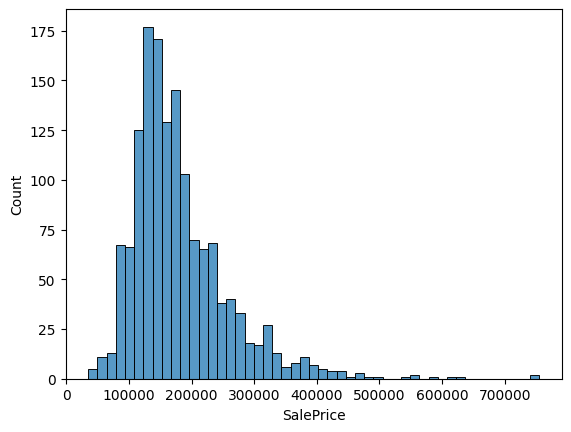

In [180]:


#Gráfico de histograma, puede ayudar a comprender la distribución de los precios de venta de las casas.
#Se puede observar la concentración de precios en diferentes rangos y determinar si hay algún patrón notable.
#El eje y muestra cuántas casas tienen un precio dentro de cada intervalo específico. Esto nos proporciona una idea de la distribución de los precios y qué intervalos son más frecuentes o menos frecuentes

sns.histplot(df, x='SalePrice')

plt.show()


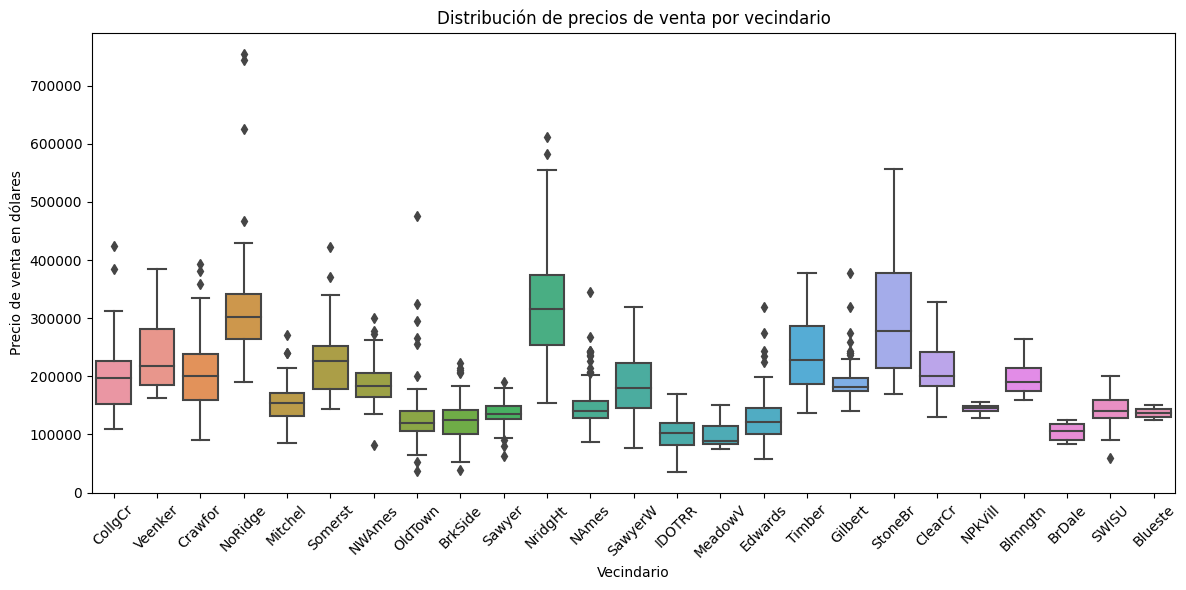

In [181]:
#Gráfico de caja (box plot) de los precios de venta según el vecindario:

plt.figure(figsize=(12, 6))  #Ajuste el tamaño del grafico

sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xlabel('Vecindario')
plt.ylabel('Precio de venta en dólares')
plt.title('Distribución de precios de venta por vecindario')
plt.xticks(rotation=45)  # Rote las etiquetas del eje x para mayor legibilidad
plt.tight_layout()  # Ajuste el espaciado entre los elementos del gráfico
plt.show()

#Interpretación: Este gráfico muestra la distribución de los precios de venta según el vecindario de las casas.
#Permite identificar diferencias en la mediana, los cuartiles y los valores atípicos entre las ubicaciones.
#Esto puede ayudar a comprender cómo la ubicación geográfica influye en los precios de venta y su variabilidad.

In [ ]:
#Heatmap (mapa de calor) de la matriz de correlación entre las variables:

correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 7})
plt.title('Matriz de correlación entre variables')
plt.show()

#Interpretación: Este gráfico muestra una matriz de correlación entre todas las variables del conjunto de datos.
#Los valores numéricos en el mapa de calor indican el grado de correlación entre las variables.
#Si encontramos una alta correlación positiva entre una variable y el precio de venta,
#podemos utilizar esa variable como un indicador relevante en la predicción de precios.

<ipython-input-182-77e091a8bded>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


La pregunta principal que habia planteado en las anteriores entregas fue: ¿Cuáles son los factores que influyen en el precio de las propiedades de venta en Nueva York y cómo se relacionan con la calificación del anfitrión y el tipo de propiedad?
En base a esa pregunta genere otras sumado a su hipotesis.

**Preguntas de interes + hipotesis de interes sobre el Dataset**

1.	¿Existe una relación entre el tamaño del terreno (LotArea) y el precio de venta de las propiedades?
**•	Hipótesis:** Se espera que las propiedades con un mayor tamaño de terreno tengan un precio de venta más alto.
2.	¿El año de construcción (YearBuilt) influye en el precio de venta de las propiedades?
**•	Hipótesis:** Se espera que las propiedades más recientes, construidas en años más cercanos al presente, tengan un precio de venta más alto debido a la mayor demanda de propiedades modernas.
3.	¿La calidad general de las propiedades (OverallQual) está relacionada con el precio de venta?
**•	Hipótesis:** Se espera que las propiedades con una calificación general más alta tengan un precio de venta más alto debido a la mayor calidad de construcción y características.
4.	¿Hay una diferencia en los precios de venta entre los diferentes tipos de propiedades (BldgType)?
**•	Hipótesis:** Se espera que ciertos tipos de propiedades, como las unifamiliares (1Fam), tengan un precio de venta más alto en comparación con otros tipos de propiedades.
5.	¿La presencia de chimeneas (Fireplaces) se asocia con un precio de venta más alto?
**•	Hipótesis:** Se espera que las propiedades con chimeneas tengan un precio de venta más alto debido a su valor añadido y comodidad.


1.	¿Existe una relación entre el tamaño del terreno (LotArea) y el precio de venta de las propiedades?
**•	Hipótesis:** Se espera que las propiedades con un mayor tamaño de terreno tengan un precio de venta más alto.

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.xlabel('Tamaño del terreno en pies (LotArea)')
plt.ylabel('Precio de venta en dolares (SalePrice)')
plt.title('Relación entre el tamaño del terreno y el precio de venta')

In [ ]:
#Correlacion
correlation = df['LotArea'].corr(df['SalePrice'])
print("Correlación entre LotArea y SalePrice:", correlation)

El resultado de la correlación entre LotArea y SalePrice es de aproximadamente 0.26. En este caso, una correlación de 0.26 sugiere una correlación positiva débil entre el tamaño del terreno (LotArea) y el precio de venta (SalePrice).

Dado que el valor de correlación está más cerca de 0 que de 1, esto indica que la relación entre el tamaño del terreno y el precio de venta no es muy fuerte. Sin embargo, al ser positiva, sugiere que a medida que aumenta el tamaño del terreno, es más probable que el precio de venta también aumente, aunque la relación no es muy pronunciada.

La correlación por sí sola no implica causalidad, solo muestra la relación estadística entre dos variables. Es importante considerar otros factores y realizar análisis más profundos para comprender completamente la influencia del tamaño del terreno en el precio de venta.

En resumen, el tamaño del terreno indica que cuanto mas grande sea el terreno mayor sera el precio del venta. Otros factores que se pueden considerar para realizar el analisis de estas dos variables son:

**1)Ubicación geográfica:** La ubicación de la propiedad puede tener un impacto en el precio de venta. Se pueden analizar variables como la ciudad, el barrio o la zona para evaluar cómo influyen en el precio.

**2)Características de la propiedad:** Además del tamaño del terreno, otras características de la propiedad pueden influir en el precio de alventaquiler, como el número de habitaciones, baños, áreas construidas, comodidades (piscina, garaje, jardín, etc.), calidad de acabados y estado general de la propiedad.

**3)Demanda y oferta del mercado:** La demanda y la oferta de propiedades de venta en el mercado en el que se encuentra la propiedad. Factores como la oferta limitada de propiedades, la demanda alta, la proximidad a servicios y comodidades, y la tendencia del mercado inmobiliario pueden influir en el precio de venta.

**4)Características socioeconómicas:** Las características socioeconómicas del área donde se encuentra la propiedad, como el nivel de ingresos promedio, el índice de desarrollo humano, el acceso a servicios públicos y el entorno social.

**5)Comparación con propiedades similares:** Habria que realizar análisis comparativos con propiedades similares en términos de tamaño del terreno y otras características relevantes. Esto permitiria evaluar cómo se compara el precio de venta de la propiedad en cuestión con otras propiedades similares en la misma área.

2.	¿El año de construcción (YearBuilt) influye en el precio de venta de las propiedades?
**•	Hipótesis:** Se espera que las propiedades más recientes, construidas en años más cercanos al presente, tengan un precio de venta más alto debido a la mayor demanda de propiedades modernas.

In [ ]:
plt.figure(figsize=(22, 6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df, width=0.6)
plt.xlabel('Año de construcción (YearBuilt)')
plt.ylabel('Precio de venta (SalePrice)')
plt.title('Distribución de precios de venta según el año de construcción')

plt.xticks(rotation=45)  # Rote las etiquetas del eje x para mayor legibilidad
plt.tight_layout()

In [ ]:
#Estadísticas descriptivas
year_stats = df.groupby('YearBuilt')['SalePrice'].describe()
print(year_stats)

El resultado que se obtuvo muestra las estadísticas descriptivas del precio de venta (SalePrice) para diferentes años de construcción (YearBuilt).

count: Número de registros en el dataset correspondientes a cada año de construcción. Indica cuántas propiedades se construyeron en ese año.

mean: Valor promedio del precio de venta para las propiedades construidas en cada año. Representa el promedio de los precios de venta.

std: Desviación estándar del precio de venta para las propiedades construidas en cada año. Mide la dispersión de los precios de venta alrededor de la media. Un valor más alto indica una mayor variabilidad en los precios.

min: Valor mínimo del precio de venta para las propiedades construidas en cada año. Es el precio más bajo observado.

25%: Percentil 25 (primer cuartil) del precio de venta para las propiedades construidas en cada año. Indica el valor por debajo del cual se encuentra el 25% de los precios más bajos.

50%: Percentil 50 (segundo cuartil o mediana) del precio de alqventauiler para las propiedades construidas en cada año. Es el valor que divide la distribución en dos partes iguales, donde el 50% de los precios se encuentran por encima y el 50% se encuentran por debajo.

75%: Percentil 75 (tercer cuartil) del precio de venta para las propiedades construidas en cada año. Indica el valor por debajo del cual se encuentra el 75% de los precios más bajos.

max: Valor máximo del precio de venta para las propiedades construidas en cada año. Es el precio más alto observado.

En resumen, estas estadísticas proporcionan información sobre la distribución y características del precio de venta para diferentes años de construcción. Se pueden analizar estas estadísticas para comprender mejor la variabilidad, tendencias y valores extremos en los precios de venta en relación con el año de construcción.

3.	¿La calidad general de las propiedades (OverallQual) está relacionada con el precio de venta?
**•	Hipótesis:** Se espera que las propiedades con una calificación general más alta tengan un precio de venta más alto debido a la mayor calidad de construcción y características.

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('Calidad general de la propiedad (OverallQual)')
plt.ylabel('Precio de venta en dolares (SalePrice)')
plt.title('Relación entre la calidad general y el precio de venta')

In [ ]:
#Media de precios de venta por nivel de calidad
quality_mean = df.groupby('OverallQual')['SalePrice'].mean()
print(quality_mean)

El resultado que se obtuvo muestra la media de los precios de venta (SalePrice) para cada nivel de calidad general de la propiedad (OverallQual).

El nivel de calidad general de la propiedad varía del 1 al 10, donde 1 es la calidad más baja y 10 es la calidad más alta.

Para cada nivel de calidad general, se calculó la media de los precios de venta correspondientes a las propiedades de ese nivel.

Por ejemplo, para las propiedades con un nivel de calidad general de 1, la media del precio de venta es de 50,150.

A medida que aumenta el nivel de calidad general, también aumenta la media de los precios de venta. Esto indica una relación positiva entre la calidad general de la propiedad y el precio de venta.

Las propiedades con un nivel de calidad general de 10 tienen la media más alta de los precios de venta, con un valor de 438,588.

En resumen, estos resultados muestran cómo varían los precios de venta en función del nivel de calidad general de la propiedad. Se puede utilizar esta información para comprender mejor la influencia de la calidad general en el precio de venta y realizar comparaciones entre los diferentes niveles de calidad.

4.	¿Hay una diferencia en los precios de venta entre los diferentes tipos de propiedades (BldgType)?
**•	Hipótesis:** Se espera que ciertos tipos de propiedades, como las unifamiliares (1Fam), tengan un precio de venta más alto en comparación con otros tipos de propiedades.

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='BldgType', y='SalePrice', data=df, ci=None)
plt.xlabel('Tipo de propiedad (BldgType)')
plt.ylabel('Precio de venta promedio (SalePrice)')
plt.title('Comparación de precios de venta por tipo de propiedad')

In [ ]:
#Media de precios de venta por tipo de propiedad
price_mean = df.groupby('BldgType')['SalePrice'].mean()
print(price_mean)

El resultado que se obtuvo muestra la media de los precios de venta (SalePrice) para cada tipo de propiedad (BldgType).

Los diferentes tipos de propiedades son: '1Fam' (unifamiliar), '2fmCon' (dúplex de dos familias), 'Duplex' (dúplex), 'Twnhs' (casa adosada) y 'TwnhsE' (casa adosada de lujo).

Para cada tipo de propiedad, se calculó la media de los precios de venta correspondientes a las propiedades de ese tipo.

Por ejemplo, para las propiedades del tipo '1Fam' (unifamiliar), la media del precio de venta es de 185,763.

Las propiedades del tipo 'TwnhsE' (casa adosada de lujo) tienen la media más alta de los precios de venta, con un valor de 181,959.

Por otro lado, las propiedades del tipo '2fmCon' (dúplex de dos familias) tienen la media más baja de los precios de venta, con un valor de 128,432.

En resumen, estos resultados muestran las diferencias en los precios de venta entre los diferentes tipos de propiedades. Se puede utilizar esta información para comprender cómo varían los precios según el tipo de propiedad y realizar comparaciones entre ellos.

5.	¿La presencia de chimeneas (Fireplaces) se asocia con un precio de venta más alto?
**•	Hipótesis:** Se espera que las propiedades con chimeneas tengan un precio de venta más alto debido a su valor añadido y comodidad.


In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Fireplaces', y='SalePrice', data=df)
plt.xlabel('Número de chimeneas')
plt.ylabel('Precio de venta promedio (SalePrice)')
plt.title('Comparación de precios de venta según la presencia de chimeneas')

In [ ]:
#Promedio de precios de venta para propiedades con y sin chimeneas
fireplace_mean = df.groupby('Fireplaces')['SalePrice'].mean()
print(fireplace_mean)


El resultado que se obtuvo muestra el promedio de los precios de venta (SalePrice) para propiedades con diferentes cantidades de chimeneas.

La columna 'Fireplaces' representa el número de chimeneas en cada propiedad.

Para cada cantidad de chimeneas, se calculó el promedio de los precios de venta correspondientes a las propiedades con esa cantidad.

Por ejemplo, para las propiedades sin chimeneas (Fireplaces = 0), el promedio del precio de venta es de 141,331.

A medida que aumenta la cantidad de chimeneas, también aumenta el promedio de los precios de venta. Esto indica una asociación positiva entre la presencia de chimeneas y el precio de venta.

Las propiedades con 3 chimeneas tienen el promedio más alto de los precios de venta, con un valor de 252,000.

En resumen, estos resultados muestran cómo varían los precios de venta en función de la presencia y cantidad de chimeneas en las propiedades. Se puede utilizar esta información para comprender mejor la influencia de las chimeneas en el precio de venta y realizar comparaciones entre las diferentes cantidades de chimeneas.

1- Definición de objetivo:

El objetivo de este análisis es identificar los factores que influyen en el precio de las
propiedades de venta en la ciudad de Nueva York y explorar cómo se relacionan estos
factores con la calificación del anfitrión y el tipo de propiedad. A través del
análisis de datos y visualizaciones, buscamos comprender qué variables pueden tener un
impacto en los precios de venta  y si existen patrones o tendencias específicas asociadas
con la calificación del anfitrión y el tipo de propiedad.

2- Contexto comercial:

El contexto comercial de este proyecto se enmarca en el mercado inmobiliario de Nueva York. Entender los factores que influyen en los precios de venta  es esencial para inversores, propietarios y agencias inmobiliarias, ya que les permite tomar decisiones informadas sobre la valoración de propiedades, estrategias de precios y mejorar la satisfacción del cliente al ofrecer propiedades de alta calidad.

3- Problema comercial:

El problema comercial es la falta de una comprensión clara y detallada de los factores que afectan los precios de venta  en Nueva York. La falta de información sobre qué características o aspectos influyen en los precios de venta  puede llevar a decisiones ineficientes en el mercado inmobiliario, como precios poco competitivos, propiedades sobrevaloradas o subestimadas, y oportunidades perdidas para maximizar los ingresos.

4- Contexto analítico:

En este análisis, voy a trabajar con una única base de datos llamada "Precios de las vivienda" o "House Prices". La base de datos contiene información sobre distintas características de las propiedades de venta  en Nueva York, como el tamaño del terreno, año de construcción, calidad general, si tienen chimeneas, entre otras variables.

5- Exploración de datos (EDA):
En esta sección, voy a llevar realizar un análisis exploratorio de los datos (EDA) para comprender el comportamiento de las variables presentes en la base de datos. Voy a realizar visualizaciones, cálculos estadísticos y resúmenes numéricos para examinar la distribución de las variables, identificar relaciones entre ellas y detectar patrones o tendencias relevantes. Esto nos permite obtener una visión general de los datos y ayudará a identificar posibles factores que puedan estar asociados con los precios de venta  y su relación con la calificación del anfitrión y el tipo de propiedad.

# **1) Elegir los mejores features para reducir la dimensionalidad del dataset. **

In [ ]:
columnas_numericas = df.select_dtypes(include=[np.number])
correlaciones = columnas_numericas.corr()['SalePrice'].drop('SalePrice')

In [ ]:
print(correlaciones)

In [ ]:
#Variables con correlacion mayor o igual a 0,5
limite = 0.5

features_relevantes = correlaciones[correlaciones.abs() >= limite].index.tolist()

#Seleccione las features con un numero de correlacion mayor o igual a 0.5 relacionado al precio de alquiler

In [ ]:
print(features_relevantes)

JUSTIFICACION

Elegi estas features porque tienen una correlación fuerte (mayor o igual a 0.5) con el precio de alquiler.
Esto muestra que tienen una influencia significativa en la variación de los precios de alquiler.
Al usar estas features en el modelo, espero poder mejorar la capacidad de pronosticar los precios de alquiler

# **2) Elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos.**
Y
# **3) Cálculo de métricas para validar el modelo.**

**Regresion Lineal**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Este código configura los datos de entrenamiento y prueba para que se pueda usar en la construcción y evaluación del modelo de regresión.

X = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio:", mse)
print("Error absoluto medio:", mae)
print("R-cuadrado:", r2)

**Interpretacion**

**Error cuadrático medio (MSE):** El MSE es el promedio de los errores al cuadrado entre las predicciones y los valores reales. En este caso, dio un valor de aproximadamente 1.558.239.575. Esto quiere decir que las predicciones tienen, en promedio, un error cuadrático de alrededor de 1558239575.15 respecto a los valores reales. Un MSE menor indicaría que nuestras predicciones están más cercanas a los valores reales.

**Error absoluto medio (MAE):** El MAE es la media de las diferencias absolutas entre nuestras predicciones y los valores reales. Al calcularlo, dio un valor de cerca de 24774.22 para el MAE. Esto significa que nuestras predicciones, en promedio, se desvían alrededor de 24,774.22 unidades de los valores reales. Un MAE más bajo indica que nuestras predicciones son más precisas.

**Coeficiente de determinación (R-cuadrado):** El R-cuadrado muestra cómo nuestras variables que utilizamos para predecir se relacionan con la variabilidad en la variable objetivo. Nuestro modelo dio un valor de aproximadamente 0.797 para el R-cuadrado. Esto nos dice que aproximadamente el 79.7% de la variabilidad en los precios de alquiler puede ser explicada por las variables que hemos considerado en el modelo. Un valor de R-cuadrado más cercano a 1 indica un mejor ajuste del modelo.

Estos resultados muestran que nuestro modelo está capturando en gran medida la relación entre las variables seleccionadas y los precios de alquiler.

# **4) Generar conclusiones con base a los resultados obtenidos**

En este análisis, se exploro un conjunto de datos inmobiliarios de Nueva York para comprender los factores que influyen en los precios de alquiler. Nuestro objetivo era determinar qué variables están más relacionadas con el precio de alquiler y construir un modelo de regresión lineal para predecir estos precios con precisión. Estos son los resultados clave que obtuve:

Utilice un enfoque de análisis exploratorio de datos (EDA) para comprender la distribución y la relación entre las variables. Identifique que las variables 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars' y 'GarageArea' mostraban una correlación significativa con el precio de alquiler.

Realice una selección de características basada en las correlaciones y elegi estas variables como variables explicativas para el modelo de regresión lineal.

Entre un modelo de regresión lineal utilizando los datos de entrenamiento y evalue su rendimiento utilizando métricas como el error cuadrático medio (MSE), el error absoluto medio (MAE) y el coeficiente de determinación (R-squared).

In [ ]:
X = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Regresión Lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

#Árbol de Decisión
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

#Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

#Evaluación de métricas
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

mse_lr, mae_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_dt, mae_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
mse_rf, mae_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

print("Regresión Lineal:")
print("MSE:", mse_lr)
print("MAE:", mae_lr)
print("R-squared:", r2_lr)
print()

print("Árbol de Decisión:")
print("MSE:", mse_dt)
print("MAE:", mae_dt)
print("R-squared:", r2_dt)
print()

print("Random Forest:")
print("MSE:", mse_rf)
print("MAE:", mae_rf)
print("R-squared:", r2_rf)


# **2) Identificar por medio de las metricas generadas si se puede tener una situacion de overfitting (sobreajuste) o underfitting (subajuste), discutiendo posibles formas de mejora**

# **Regresión Lineal:**

MSE: 1558239575.151088

MAE: 24774.219519604765

R-squared: 0.7968483304281099

El modelo de regresión lineal parece funcionar bastante bien, ya que su puntuación llamada "coeficiente de determinación" (R-squared) está alrededor de 0.80. Sin embargo, podría haber espacio para mejorar, ya que el R-squared no es tan alto.

# **Árbol de Decisión:**

MSE: 1927674393.8188736

MAE: 26351.182648401824

R-squared: 0.748684170431678

El modelo de árbol de decisión tiene un R-squared más bajo en comparación con la regresión lineal, lo que queire decir que podría no estar ajustando los datos de manera óptima. Los valores más altos de MSE y MAE también indican que podría haber margen para mejorar.

# **Random Forest:**

MSE: 862157768.5480891

MAE: 18907.850671885193

R-squared: 0.8875982917466738

El modelo Random Forest muestra el mejor rendimiento entre los tres. Su R-squared cercano a 0.89 y los valores bajos de MSE y MAE indican que este modelo se adapta muy bien a los datos y puede reflejar de manera efectiva las relaciones entre las características y el precio de alquiler.

En general, el modelo Random Forest tiene un mejor rendimiento en comparación con los otros dos modelos

# **Descripcion**

En este proyecto de data science, nos hemos sumergido en el apasionante mundo de los datos para explorar y comprender los factores que influyen en los precios de venta de propiedades en el mercado inmobiliario de Nueva York. Nuestro objetivo principal era responder a una serie de preguntas clave que podrían ayudar a inversores, propietarios y agencias inmobiliarias a tomar decisiones más informadas y estratégicas.

Nuestra audiencia objetivo es variada, pero principalmente se dirige a aquellos involucrados en el mercado inmobiliario, desde inversores hasta profesionales del sector. También podría beneficiar a analistas y entusiastas de los datos que buscan una comprensión más profunda de cómo los atributos de una propiedad pueden afectar su precio de venta.

Comenzamos planteando preguntas y formulando hipótesis sobre los factores que podrían influir en los precios de venta. Luego, utilizando un conjunto de datos tabulares que contenía información sobre diversas características de las propiedades, como su calidad general, año de construcción y tamaño, emprendimos un análisis exploratorio en Python. Este análisis nos permitió comprender mejor la distribución de los datos, identificar patrones y tendencias, y visualizar cómo se relacionan las diferentes características con los precios de venta.

A través de visualizaciones como gráficos de dispersión, histogramas y gráficos de barras, pudimos destacar la importancia de características clave, como la calidad general de la propiedad y su área habitable, en la determinación de los precios de venta. Identificamos que estas características tenían una fuerte correlación con los precios, lo que sugiere que las propiedades de mayor calidad y tamaño tienden a tener ventas más altos.

Para analizar más profundamente estas relaciones y desarrollar modelos predictivos, aplicamos técnicas de Machine Learning. Utilizamos modelos de regresión lineal, árboles de decisión y bosques aleatorios para predecir los precios de venta en función de las características de la propiedad. Evaluamos la eficacia de estos modelos mediante métricas como el error cuadrático medio, el error absoluto medio y el coeficiente de determinación. Esto nos permitió comprender cómo se ajustaban los modelos a los datos y cómo de bien predecían los precios reales.

En resumen, este proyecto no solo nos brindó un mayor entendimiento de los factores que influyen en los precios de venta en el mercado inmobiliario de Nueva York, sino que también nos permitió aplicar técnicas de análisis de datos y Machine Learning en un contexto real. Nuestros resultados y conclusiones podrían beneficiar a quienes toman decisiones en el mercado inmobiliario al proporcionarles información valiosa para ajustar estrategias de precios y mejorar la satisfacción del cliente al ofrecer propiedades con precios justos y comvos.







# ***Preguntas / Hipótesis***

La pregunta principal al inicio del proyecto fue la siguiente:

1.	¿Qué factores influyen en los precios de venta en el mercado inmobiliario de Nueva York?
Hipótesis: Diferentes características de las propiedades, como su calidad general, tamaño, antigüedad y comodidades, pueden influir en sus precios de venta.

A lo largo del análisis fueron surgiendo otras preguntas como estas:

2.	¿Existe una relación entre la calidad general de una propiedad y su precio de venta?
Hipótesis: Las propiedades con una calidad general más alta pueden tener precios de venta más altos por su mayor atractivo y mejores comodidades.

3.	¿Cómo afecta el tamaño de una propiedad a su precio de venta?
Hipótesis: Las propiedades más grandes tienden a tener precios de venta más altos por su mayor espacio y comodidades.
    
4.	¿Cuál es el impacto del año de construcción en los precios de venta?
Hipótesis: Las propiedades más nuevas pueden tener precios de venta más altos por su modernidad y estado de mantenimiento.
    
5.	¿Cómo se relaciona el área del sótano total con el precio de venta?
Hipótesis: Un área de sótano mayor podría influir en un aumento del precio de venta por el espacio adicional que ofrece.
    
6.	¿Cuál es la influencia de las áreas del primer y segundo piso en los precios de venta?
Hipótesis: Áreas más grandes en el primer y segundo piso pueden contribuir a aumentos en los precios de venta por la disponibilidad de espacio habitable.

7.	¿Cómo se relaciona el número de baños en la propiedad con los precios de venta?
Hipótesis: Las propiedades con más baños pueden tener precios de venta más altos por la comodidad y el valor agregado que ofrecen.

8.	¿Influye el número total de habitaciones en la propiedad en sus precios de venta?
Hipótesis: Propiedades con más habitaciones podrían tener precios de venta más altos por la capacidad de alojar a más personas.

9.	¿Cómo afecta el tamaño del garaje al precio de venta?
Hipótesis: Un garaje con mayor capacidad para autos puede contribuir a un aumento en el precio de venta por el valor agregado de estacionamiento.

Mediante el análisis de datos y la construcción de modelos de Machine Learning, pudimos abordar estas preguntas e hipótesis, identificando relaciones, patrones y tendencias en los datos que nos proporcionaron información valiosa sobre los factores que afectan los precios de venta en el mercado inmobiliario de Nueva York.

# ***Analisis Exploratorio de los Datos***

El análisis exploratorio de datos es una fase esencial en cualquier proyecto de data Science. En este caso, analizamos un conjunto de datos relacionado con el mercado inmobiliario de Nueva York con el objetivo de comprender mejor los factores que influyen en los precios de venta de propiedades. A través de visualizaciones y análisis de datos, pudimos obtener información valiosa sobre las relaciones y patrones presentes en los datos.

Comenzamos con una revisión general de los datos, identificando las variables disponibles, como las numéricas y categóricas. Esto nos permitió entender la diversidad de información a nuestra disposición. Luego, nos centramos en un análisis más detallado de la variable objetivo, "SalePrice", que representa el precio de venta. Utilizamos histogramas para examinar su distribución y notamos que se asemeja a una distribución normal con algunas desviaciones


Exploramos la relación entre "SalePrice" y varias características clave, como "OverallQual", "YearBuilt", "TotalBsmtSF", "GrLivArea" y más. Utilizamos gráficos de dispersión para visualizar estas relaciones, lo que nos permitió observar tendencias generales. Por ejemplo, notamos que las propiedades de mayor calidad general tienden a tener precios de ventas mas altos.

Ademas, s, identificamos posibles relaciones no lineales y patrones utilizando boxplots. Estos gráficos revelaron cómo las propiedades con ciertas características podrían tener precios de venta atípicos en comparación con el resto. Por ejemplo, las propiedades con garajes más grandes podrían tener precios de venta más altos, pero también presentar valores atíps.

Tambien ién calculamos correlaciones entre las variables, lo que nos permitió cuantificar las relaciones lineales entre "SalePrice" y otras características. Encontramos que características como 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars' y 'GarageArea' tenían correlaciones significativas con los precios de venta, lo que respaldaba nuestras observaciones antres.

En
En resumen, el análisis exploratorio de datos nos permitió visualizar y comprender mejor la estructura y las relaciones presentes en el conjunto de datos. Estas observaciones nos proporcionaron información crucial para tomar decisiones informadas sobre las variables a considerar en nuestros modelos de Machine Learing.


# ***Visualización de Datos:***

## **Histograma de Precios de Venta**

In [ ]:
# Histograma para visualizar la distribución de los precios de Venta
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Venta')
plt.show()

El histograma de los precios de venta representaría en el eje x los diferentes intervalos de precios, y en el eje y, mostraría la cantidad de propiedades que tienen un precio de venta dentro de cada intervalo. Esto nos brinda información valiosa sobre cómo se agrupan los precios en distintos rangos, lo que nos permite identificar en qué rango de precios se venden predominantemente las propiedades en el mercado inmobiliario de Nueva York. Además, también nos ayuda a detectar valores inusuales o atípicos que se desvían de la distribución general de los precios.

## **Gráficos de Dispersión de Variables Relevantes**
**Relación entre "OverallQual"(Calificacion General) y "SalePrice"(Precio de venta)**

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['OverallQual'], df['SalePrice'], color='blue', alpha=0.5)
plt.title('Relación entre Calidad General y Precio de Venta')
plt.xlabel('Calidad General de la Propiedad')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()

 En nuestro análisis exploratorio de datos de precios de venta, creamos gráficos de dispersión para explorar cómo se relacionan ciertas variables con los precios de venta. Cada punto en el gráfico representa una propiedad. En el eje x, tenemos los valores de la variable que estamos explorando, Calidad General en este caso, y en el eje y, tenemos los precios de venta correspondientes. Al observar cómo se distribuyen los puntos en el gráfico, podemos identificar patrones o tendencias.

 Crear un gráfico de dispersión muestra cómo se relaciona la calidad general de la propiedad ("OverallQual") con los precios de venta ("SalePrice"). Los puntos en el gráfico ayudarán a visualizar si hay una tendencia general de que propiedades de mayor calidad tengan precios de venta más altos.

# **Boxplots / Variabilidad en los Precios de Venta según Características Relevantes**

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=df)
plt.xlabel('Tamaño del Garaje')
plt.ylabel('Precio de Venta')
plt.title('Variabilidad en los Precios de Venta según el Tamaño del Garaje')
plt.xticks(rotation=45)
plt.show()

Los boxplots son una herramienta visual que nos permite explorar la distribución y variabilidad de los datos. En el contexto de nuestro análisis, los boxplots nos muestran cómo varía el precio de venta en función de diferentes categorías o características. Cada boxplot representa la distribución de los precios en un grupo específico, permitiéndonos identificar tendencias, valores atípicos y la dispersión de los datos en cada grupo.

En este caso nos interesa entender cómo influye el tamaño del garaje en los precios de venta de las propiedades en Nueva York. En este gráfico, cada 'caja' representa la variabilidad de los precios de venta para diferentes tamaños de garaje.

La línea en el centro de cada caja representa la mediana del precio de venta para ese tamaño de garaje en particular. La parte inferior y superior de la caja representan el primer y tercer cuartil, respectivamente, lo que nos da una idea de la dispersión de los precios. Además, los puntos que están más allá de las 'barras' (valores atípicos) pueden indicar propiedades con precios inusuales en relación con su tamaño de garaje.

Al ver este gráfico, podemos identificar si ciertos tamaños de garaje tienden a estar asociados con precios más altos o más bajos. Esto nos da una idea de cómo esta característica específica puede influir en el precio de venta de una propiedad.

# **Matriz de Correlación de Variables y Precios de Venta**

In [ ]:
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={'size': 8})
plt.title('Matriz de Correlación de Variables y Precios de Venta')
plt.show()


Para comprender mejor cómo diferentes variables se relacionan entre sí y con los precios de venta en nuestro análisis, utilizamos una matriz de correlación visual.

Esta matriz nos permite identificar patrones y relaciones en los datos, indicando qué variables están más estrechamente relacionadas con los precios de venta y cuáles pueden influir de manera significativa en ellos. Los valores en la matriz van desde -1 hasta 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica que no hay correlación lineal entre las variables

Imaginen esta matriz como una tabla que muestra cómo los valores de diferentes variables pueden cambiar juntos. Cada celda de la matriz está coloreada de manera específica para indicar la fuerza y dirección de la relación entre dos variables.

Cuando dos variables tienen una correlación cercana a 1, significa que tienden a aumentar juntas. En nuestro contexto, si vemos una celda que está más cerca del color rojo intenso, eso podría indicar que cuando una variable aumenta, la otra también tiende a aumentar, lo que sugiere una relación positiva. Por ejemplo, si el tamaño de la casa (Área habitable) y el precio de venta tienen una correlación alta, eso podría indicar que casas más grandes tienden a tener precios de venta más caros.

Por otro lado, si dos variables tienen una correlación cercana a -1, eso significa que cuando una variable aumenta, la otra tiende a disminuir. En la matriz, si vemos una celda más cercana al color azul intenso, esto podría sugerir una relación negativa. Por ejemplo, si la antigüedad de la casa y el precio de venta tienen una correlación cercana a -1, eso podría significar que casas más antiguas tienden a tener precios de venta más baratos.

Una correlación cercana a 0, representada por una celda más cercana al color blanco, sugiere que no hay una relación lineal fuerte entre las variables.

Esta matriz de correlación visual nos ayuda a entender qué variables podrían estar influyendo en los precios de venta y cómo están relacionadas entre sí. Nos permite identificar patrones que nos ayudarán a tomar decisiones más informadas en nuestro análisis de datos.

# **Comparación de Modelos de Machine Learning**

En esta etapa, llevamos a cabo una evaluación exhaustiva de tres modelos de Machine Learning: Regresión Lineal, Árbol de Decisión y Random Forest. El objetivo es determinar cuál de estos modelos ofrece el mejor rendimiento en la predicción de los precios de venta de propiedades en Nueva York. Utilizamos métricas clave como el Mean Squared Error (MSE), el Mean Absolute Error (MAE) y el Coeficiente de Determinación (R-squared) para medir la calidad de las predicciones de cada modelo.

Para visualizar de manera efectiva cómo se ajustan y predicen los diferentes modelos, creamos gráficos que comparan las predicciones realizadas por cada modelo con los valores reales de los precios de venta. Estos gráficos nos permiten observar visualmente cuán cercanas están las predicciones a los valores reales y qué tan bien se ajustan a la línea de referencia.

In [ ]:
# Seleccion de las características y la variable objetivo
X = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
y = df['SalePrice']

# Division de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entreno de los modelos
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Predicciones
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Gráfico de comparación
plt.figure(figsize=(14, 10))

plt.scatter(y_test, y_pred_lr, color='blue', label='Regresión Lineal', alpha=0.7, s=30)
plt.scatter(y_test, y_pred_dt, color='green', label='Árbol de Decisión', alpha=0.9, s=30)  # Ajusta el valor de alpha
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest', alpha=0.6, s=30)     # Ajusta el valor de alpha

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Línea de Referencia')

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones con Valores Reales para Modelos de Machine Learning')
plt.legend(loc='upper left')
plt.show()

Este código generará un gráfico en el que los puntos representan las predicciones hechas por cada modelo en relación con los valores reales. La línea de referencia en forma de línea punteada muestra dónde deberían estar las predicciones si fueran perfectas. Esta visualización te ayuda a evaluar visualmente la calidad de las predicciones de los diferentes modelos.

Este gráfico de comparación es una herramienta valiosa para entender cómo se desempeñan nuestros modelos de Machine Learning en la predicción de los precios de venta. Cada punto en el gráfico representa una propiedad individual y su posición en el eje horizontal corresponde al valor real del precio de venta. La posición vertical del punto corresponde a la predicción hecha por uno de nuestros modelos.

Idealmente, si las predicciones fueran perfectas, veríamos que todos los puntos se alinean exactamente a lo largo de la línea punteada, que es nuestra línea de referencia. Sin embargo, en la realidad, es probable que veamos cierta dispersión alrededor de esta línea. Los puntos que están más cerca de la línea punteada indican predicciones precisas, mientras que los puntos que se alejan más podrían indicar errores en las predicciones.

Al comparar los puntos entre los tres modelos (Regresión Lineal, Árbol de Decisión y Random Forest), podemos evaluar cuál de ellos se ajusta más a la línea de referencia y, por lo tanto, cuál modelo tiende a hacer predicciones más cercanas a los valores reales. Esto nos proporciona una comprensión intuitiva de cómo se comportan nuestros modelos en diferentes rangos de precios y nos ayuda a determinar cuál modelo es más confiable en la predicción de los precios de venta de propiedades en Nueva York.

# Conclusion del grafico

Observando el gráfico de comparación de las predicciones, podemos ver que los puntos del modelo Random Forest están más cerca de la línea punteada de referencia en comparación con los otros modelos. Esto se debe a que el Random Forest utiliza múltiples árboles de decisión para realizar predicciones y luego promedia sus resultados. Esta técnica de promediado reduce el impacto de los errores individuales y puede resultar en predicciones más precisas y estables en general. Como resultado, el modelo Random Forest tiende a estar más alineado con la línea punteada de referencia, lo que indica una mejor capacidad para predecir los valores reales de los precios de venta.

# Descarga de datos desde APIs públicas - Complemento de Datos de Precios de Viviendas


# Descripción
Este proyecto tiene como objetivo complementar los datos de precios de viviendas con datos meteorológicos correspondientes a los vecindarios. Esto nos permitirá explorar si existe alguna relación entre las condiciones climáticas y los precios de las viviendas en diferentes áreas.


# Pasos Realizados
1. Seleccioné la API de OpenWeatherMap para obtener datos meteorológicos.
2. Obtuve una clave de API registrándome en el sitio web de OpenWeatherMap.
3. Realicé solicitudes a la API para obtener datos meteorológicos para varios vecindarios.
4. Mapeé los nombres de los vecindarios en el conjunto de datos original para que coincidieran con los registros en OpenWeatherMap.


In [ ]:
import requests
api_key = '452770b6f1c2a5958fce6c7d66ac506e'

# URL de la API de OpenWeatherMap para obtener datos meteorológicos de Nueva York
url = f'http://api.openweathermap.org/data/2.5/weather?q=New+York&appid={api_key}'

# Solicitud a la API
response = requests.get(url)

# Comprobamos si la solicitud fue exitosa
if response.status_code == 200:
    weather_data = response.json()
else:
    print('Error al hacer la solicitud a la API.')

# Visualizacion de los datos obtenidos
print(weather_data)

In [ ]:
# DataFrame de los datos meteorológicos
weather_df = pd.DataFrame({
    'Ciudad': [weather_data['name']],
    'Temperatura (K)': [weather_data['main']['temp']],
    'Humedad (%)': [weather_data['main']['humidity']],
    'Descripción del clima': [weather_data['weather'][0]['description']]
})

# Converti la temperatura de Kelvin a Celsius
weather_df['Temperatura (°C)'] = weather_df['Temperatura (K)'] - 273.15

# Visualizacion del DataFrame
print(weather_df)

In [ ]:
# Clave de API de OpenWeatherMap
api_key = '452770b6f1c2a5958fce6c7d66ac506e'

# Lista de vecindarios
neighborhoods = [
    'Bloomington',  # Cambiado de 'Blmngtn,Bloomington Heights'
    'Bluestem',
    'Briardale',  # Cambiado de 'BrDale,Briardale'
    'Brookside',  # Cambiado de 'BrkSide,Brookside'
    'Clear Creek',  # Cambiado de 'ClearCr,Clear Creek'
    'College, US',  # Cambiado de 'CollgCr,College Creek'
    'Crawford',
    'Edwards',
    'Gilbert',
    'Iowa, US',  # Cambiado de 'IDOTRR,Iowa DOT and Rail Road'
    'Meadow Village',  # Cambiado de 'MeadowV,Meadow Village'
    'Mitchell',
    'Ames',  # Cambiado de 'Names,North Ames'
    'Northridge',  # Cambiado de 'NoRidge,Northridge'
    'Northridge Heights',  # Cambiado de 'NridgHt,Northridge Heights'
    'Old Town',  # Cambiado de 'OldTown,Old Town'
    'Ames, US',  # Cambiado de 'SWISU,South & West of Iowa State University a Ames, US'
    'Sawyer',
    'Sawyer, US',  # Cambiado de 'SawyerW,Sawyer West'
    'Stone Brook',  # Cambiado de 'StoneBr,Stone Brook'
    'Timberland',  # Cambiado de 'Timber,Timberland'
    'Somerset, US' # Cambiado de Veenker a Somerset, US
]

# DataFrame para almacenar datos meteorológicos de vecindarios
neighborhood_weather_df = pd.DataFrame(columns=['Vecindario', 'Temperatura (K)', 'Humedad (%)', 'Descripción del clima'])

for neighborhood in neighborhoods:
    # Solicitud a la API de OpenWeatherMap para el vecindario actual
    url = f'http://api.openweathermap.org/data/2.5/weather?q={neighborhood},Iowa,US&appid={api_key}'
    response = requests.get(url)

    if response.status_code == 200:
        weather_data = response.json()
        # DataFrame temporal para el vecindario actual
        temp_df = pd.DataFrame({
            'Vecindario': [neighborhood.split(',')[0]],
            'Temperatura (K)': [weather_data['main']['temp']],
            'Humedad (%)': [weather_data['main']['humidity']],
            'Descripción del clima': [weather_data['weather'][0]['description']]
        })
        # Convertir la temperatura de Kelvin a Celsius
        temp_df['Temperatura (°C)'] = temp_df['Temperatura (K)'] - 273.15
        # pandas.concat para agregar el DataFrame temporal al DataFrame principal
        neighborhood_weather_df = pd.concat([neighborhood_weather_df, temp_df], ignore_index=True)
    else:
        print(f'Error al obtener datos meteorológicos para {neighborhood}')

# Visualizacion del DataFrame con datos meteorológicos para cada vecindario
print(neighborhood_weather_df)

In [ ]:
# Diccionario de mapeo de nombres de vecindarios
mapeo_vecindarios = {
    'CollgCr': 'College, US',
    'Veenker': 'Somerset, US',
    'Crawfor': 'Crawford',
    'NoRidge': 'Northridge',
    'Mitchel': 'Mitchell',
    'Somerst': 'Somerset, US',
    'NWAmes': 'Ames',
    'OldTown': 'Old Town',
    'BrkSide': 'Brookside',
    'Sawyer': 'Sawyer',
    'NridgHt': 'Northridge Heights',
    'NAmes': 'Ames',
    'SawyerW': 'Sawyer, US',
    'IDOTRR': 'Iowa, US',
    'MeadowV': 'Meadow Village',
    'Edwards': 'Edwards',
    'Timber': 'Timberland',
    'Gilbert': 'Gilbert',
    'StoneBr': 'Stone Brook',
    'ClearCr': 'Clear Creek',
    'NPkVill': 'Ames',
    'Blmngtn': 'Bloomington',
    'BrDale': 'Briardale',
    'SWISU': 'Ames, US',
    'Blueste': 'Bluestem'
}

# Reemplazo de los nombres de vecindarios en el DataFrame original
df['Neighborhood'] = df['Neighborhood'].map(mapeo_vecindarios)

# Se realizo un mapeo de los nombres de los vecindarios para que coincidan con los registros en OpenWeatherMap.

In [ ]:
# Renombre la columna 'Vecindario' en el DataFrame de datos meteorológicos para que coincida con el DataFrame original
neighborhood_weather_df.rename(columns={'Vecindario': 'Neighborhood'}, inplace=True)

# Combine el DataFrame original con los datos meteorológicos usando la columna 'Neighborhood' como clave
df = df.merge(neighborhood_weather_df, on='Neighborhood', how='left')

In [ ]:
# Concatenar el DataFrame original (df) con el DataFrame de datos meteorológicos (neighborhood_weather_df)
combined_df = pd.concat([df, neighborhood_weather_df], axis=1)

# Mostrar las primeras filas del DataFrame combinado
print(combined_df.head())


Como ya realice parte de la limpieza de datos al obtener información meteorológica de los vecindarios en la entrega anterior de "Descarga de datos desde APIs publicas", en esta entrega voy a limpiar y analizar el conjunto de datos original siguiendo estos pasos:

1)Manejo de valores nulos

2)Deteccion y manejo de duplicados

3)Manejo de outliers

# **1) Manejo de valores nulos**
Voy a verificar la presencia de valores nulos y decidir cómo manejarlos. Asi sea la eliminación de filas o columnas con muchos valores nulos, o rellenando valores en función de la lógica de negocio.

In [ ]:
# Verificamos si hay valores nulos
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

Estas son las columnas que contienen valores nulos junto con la cantidad de valores nulos en cada una de ellas.

# **Lo siguiente que vamos a hacer es:**

# 1.   Eliminación de columnas con muchos valores nulos:

Algunas columnas, como 'Alley (Pasillo)', 'PoolQC (Calidad de la piscina)', 'Fence (Cerca)' y 'MiscFeature (Características Adicionales)', tienen una gran cantidad de valores nulos, se puede considerar eliminarlas del conjunto de datos, ya que pueden no aportar información útil y podrían dificultar el análisis.

# 2.   Reemplazo de valores en otras columnas:

Para las columnas restantes con valores nulos, podemos reemplazarlos de la siguiente manera:

*   Para las columnas numéricas, como 'LotFrontage (Frente del Lote)', 'MasVnrArea (Área de Revestimiento de Mampostería)' y columnas relacionadas con el garaje, se podrian llenar los valores nulos con la media de esa columna. Ya que la media es menos sensible a valores atípicos.

*  Para las columnas categóricas, como 'MasVnrType (Tipo de Revestimiento de Mampostería)', 'BsmtQual (Calidad del Sótano)', 'BsmtCond (Condición del Sótano)', etc., podríamos llenar los valores nulos con el valor más común de esa columna.

# 3.  Eliminación de filas específicas:

Si hay filas con valores nulos en columnas críticas para el análisis y no es posible reemplazarlos de manera significativa, podríamos eliminar esas filas específicas.

**Eliminamos las columnas con muchos valores nulos**

In [ ]:
# Eliminar columnas con muchos valores nulos
columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df_cleaned = df.drop(columns=columns_to_drop)

# Verificar que las columnas se eliminaron correctamente
print("Columnas eliminadas:")
print(columns_to_drop)

**Reemplazamos los valores nulos con los valores de media**

In [ ]:
# Reemplazamos valores nulos en columnas numéricas con la media
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())


**Reemplazamos los valores nulos con los valores mas comunes**

In [ ]:
# Reemplazamos valores nulos en columnas categóricas con los valores aparecen con mayor frecuencia
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])


**Verificacion de valores nulos**

In [ ]:
# Verificamos si quedan valores nulos
null_counts_cleaned = df_cleaned.isnull().sum()
print(null_counts_cleaned[null_counts_cleaned > 0])


**Luego de todo esto ya reemplazamos correctamente todos los valores nulos en el conjunto de datos.**

# **2) Detección y manejo de duplicados**
La presencia de valores duplicados en un conjunto de datos puede afectar negativamente el análisis y los modelos posteriores

Para detectar y manejar duplicados, vamos a seguir estos pasos:

**1) Detección de duplicados:** Utilizamos la función *duplicated()* de pandas para identificar filas duplicadas en el conjunto de datos. Esta función devuelve una serie booleana que indica si cada fila es un duplicado o no.

**2) Manejo de duplicados:** Luego, decidimos cómo queremos manejar los duplicados. Podemos hacer lo siguiente:

**a. Eliminar duplicados:** Podemos eliminar las filas duplicadas del conjunto de datos utilizando la función *drop_duplicates()*. Esto conservará la primera aparición de cada fila y eliminará las repeticiones posteriores.

**b. Conservar duplicados:** Si consideramos que los duplicados son importantes para el análisis, podemos optar por conservarlos. Sin embargo, hay que asegurarse de entender por qué existen duplicados y cómo pueden afectar al análisis.

**3) Verificación final:** Después de manejar los duplicados, verificamos nuevamente si quedan duplicados en el conjunto de datos para asegurarnos de que se hayan tratado adecuadamente.

# **Detección de duplicados:**

In [ ]:
duplicates = df_cleaned[df_cleaned.duplicated(keep='first')]
print(duplicates.head())

Al parecer no hay duplicados en el conjunto de datos, ya que el DataFrame está vacío. Esto es bueno, ya que significa que cada fila es única y no necesitamos realizar ninguna acción adicional.

# **3) Manejo de outliers**
Si encontramos valores atípicos, consideraremos cómo deseamos tratarlos. Esto puede incluye su eliminación o transformación.

Primero realizaremos un análisis descriptivo para identificar columnas numéricas que puedan contener valores atípicos. Luego, visualizaremos estos valores atípicos y decidiremos cómo deseamos manejarlos.

Comenzaré calculando estadísticas clave, como la media, la mediana y los cuartiles, para cada columna numérica. Esto nos proporcionará una visión general de la distribución de los datos.

In [ ]:
# Estadísticas descriptivas de columnas numéricas
numeric_stats = df_cleaned.describe()
print(numeric_stats)


Las estadísticas descriptivas muestran que algunas columnas numéricas tienen valores máximos que están bastante lejos de los valores del tercer cuartil (75%), lo que quiere decir que existe la presencia de valores atípicos.

LotFrontage (Frente del Lote)

LotArea (Área del Lote)

MasVnrArea (Área de Revestimiento de Mampostería)

BsmtFinSF1 (Área Terminada del Sótano 1)

TotalBsmtSF (Área Total del Sótano)

1stFlrSF (Área del Primer Piso)

GrLivArea (Área Habitable sobre el Nivel del Suelo)

WoodDeckSF (Área de la Terraza de Madera)

OpenPorchSF (Área del Porche Abierto)

EnclosedPorch (Área del Porche Cerrado)

3SsnPorch (Área del Porche de Tres Estaciones)

ScreenPorch (Área del Porche con Pantalla)

PoolArea (Área de la Piscina)

MiscVal (Valor Variado)

SalePrice (Precio de Venta)

Realizaré visualizaciones de las columnas que considero más relevantes o que tengan una relación aparente con la variable objetivo, que en este caso es 'SalePrice (Precio de Venta)' para identificar los valores atípicos. Luego, decidiremos cómo manejarlos

**Columnas que voy a considerar por el momento:**

'LotArea': El área del lote.

'OverallQual': La calidad general de la vivienda.

'YearBuilt': El año de construcción de la vivienda.

'GrLivArea': El área habitable sobre el nivel del suelo.

'GarageArea': El área del garaje.

'TotalBsmtSF': El área total del sótano.


In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión para 'LotArea' vs 'SalePrice'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['LotArea'], df_cleaned['SalePrice'], alpha=0.6)
plt.title('Gráfico de Dispersión de LotArea vs SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()


No se pueden identificar valores atípicos claramente. La mayoría de los puntos siguen una tendencia general, aunque hay algunos puntos en la esquina superior derecha que tienen áreas de lote ('LotArea') muy grandes pero no parecen tener un precio extremadamente alto ('SalePrice'). Sin embargo, estos puntos no se alejan significativamente de la tendencia general y podrían representar casos válidos.

In [ ]:
# Gráfico de dispersión para 'GrLivArea' vs 'SalePrice'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['GrLivArea'], df_cleaned['SalePrice'], alpha=0.6)
plt.title('Gráfico de Dispersión de GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

En el gráfico de dispersión, podemos observar que hay dos puntos en la esquina inferior derecha que tienen un área habitable ('GrLivArea') significativamente grande pero se vendieron a un precio muy bajo ('SalePrice'). Estos dos puntos parecen ser valores atípicos y pueden sesgar nuestro análisis y modelos. Por lo tanto, podemos proceder a eliminarlos.

In [ ]:
# Eliminar valores atípicos en 'GrLivArea' y 'SalePrice'
df_cleaned = df_cleaned.drop(df_cleaned[(df_cleaned['GrLivArea'] > 4000) & (df_cleaned['SalePrice'] < 300000)].index)

Ahora vamos a realizar la visualización de la relación entre la calidad general de la casa ('OverallQual') y el precio de venta ('SalePrice'). Esto nos ayudará a entender cómo la calidad general afecta el precio.

In [ ]:
# Gráfico de dispersión para 'OverallQual' vs 'SalePrice'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['OverallQual'], df_cleaned['SalePrice'], alpha=0.6)
plt.title('Gráfico de Dispersión de OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

No parece haber valores atípicos evidentes en el gráfico de dispersión de 'OverallQual' vs 'SalePrice'. Los puntos se distribuyen de manera coherente y no hay puntos que se alejen significativamente de la tendencia general.

In [ ]:
# Gráfico de dispersión para 'YearBuilt' vs 'SalePrice'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['YearBuilt'], df_cleaned['SalePrice'], alpha=0.6)
plt.title('Gráfico de Dispersión de YearBuilt vs SalePrice')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

No se pueden identificar valores atípicos claramente. Los puntos siguen una tendencia general, y aunque hay cierta dispersión en los datos, no hay puntos que se alejen significativamente de la tendencia general. Por lo tanto, no parecen haber valores atípicos notables en este gráfico.

In [ ]:
# Gráfico de dispersión para 'GarageArea' vs 'SalePrice'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['GarageArea'], df_cleaned['SalePrice'], alpha=0.6)
plt.title('Gráfico de Dispersión de GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

Hay algunos valores atípicos. Estos son los puntos que se encuentran en la esquina inferior derecha del gráfico, donde el área del garaje ('GarageArea') es grande pero el precio de venta ('SalePrice') es relativamente bajo. Estos valores atípicos pueden sesgar nuestro análisis y modelos, por lo que es recomendable considerar cómo deseamos manejarlos.

Una opción podría ser eliminar estos valores atípicos si afectan significativamente nuestro análisis.

Para eliminar los valores atípicos en la columna 'GarageArea', podemos utilizar un enfoque basado en percentiles.

In [ ]:
# Definimos los percentiles 25 y 75
q25, q75 = np.percentile(df_cleaned['GarageArea'], 25), np.percentile(df_cleaned['GarageArea'], 75)

# Calculamos el rango intercuartílico (IQR)
iqr = q75 - q25

# Calculamos los límites superior e inferior para los valores atípicos
cut_off = 1.5 * iqr
lower, upper = q25 - cut_off, q75 + cut_off

# Filtramos los valores atípicos
df_cleaned = df_cleaned[(df_cleaned['GarageArea'] > lower) & (df_cleaned['GarageArea'] < upper)]

# Verificamos la forma del DataFrame después de eliminar valores atípicos
print("Dimensiones del DataFrame después de eliminar valores atípicos en 'GarageArea':", df_cleaned.shape)


Eliminamos los valores atípicos en la columna 'GarageArea' y el DataFrame ahora tiene dimensiones de (1438, 77). Esto debería ayudar a mejorar los análisis y modelos.

In [ ]:
# Gráfico de dispersión para 'TotalBsmtSF' vs 'SalePrice'
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['TotalBsmtSF'], df_cleaned['SalePrice'], alpha=0.6)
plt.title('Gráfico de Dispersión de TotalBsmtSF vs SalePrice')
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

Se pueden identificar algunos valores atípicos en la esquina inferior derecha. Estos puntos tienen un área total del sótano ('TotalBsmtSF') relativamente grande pero un precio de venta ('SalePrice') más bajo en comparación con la tendencia general.

Estos valores atípicos podrían afectar nuestro análisis y modelos. Una opción sería eliminar estos valores atípicos si creemos que tienen un impacto negativo en nuestro análisis.

In [ ]:
# Definimos los percentiles 25 y 75
q25, q75 = np.percentile(df_cleaned['TotalBsmtSF'], 25), np.percentile(df_cleaned['TotalBsmtSF'], 75)

# Calculamos el rango intercuartílico (IQR)
iqr = q75 - q25

# Calculamos los límites superior e inferior para los valores atípicos
cut_off = 1.5 * iqr
lower, upper = q25 - cut_off, q75 + cut_off

# Filtramos los valores atípicos
df_cleaned = df_cleaned[(df_cleaned['TotalBsmtSF'] > lower) & (df_cleaned['TotalBsmtSF'] < upper)]

# Verificamos la forma del DataFrame después de eliminar valores atípicos
print("Dimensiones del DataFrame después de eliminar valores atípicos en 'TotalBsmtSF':", df_cleaned.shape)

## Contexto y Audiencia

**Contexto:**
En este proyecto, nos enfocaremos en analizar y obtener insights valiosos relacionados con los precios de venta de viviendas utilizando el conjunto de datos "house-prices-advanced-regression-techniques". Este conjunto de datos recopila información fundamental sobre propiedades residenciales y es un recurso esencial para profesionales de bienes raíces, inversores y cualquier persona interesada en comprender los factores que afectan los precios de venta de viviendas.

**Audiencia:**
Nuestro análisis está diseñado para ser de utilidad para los siguientes grupos de personas:

- Profesionales de bienes raíces que buscan comprender mejor el mercado y los factores que influyen en los precios de las viviendas.
- Inversores interesados en tomar decisiones informadas sobre la compra o venta de propiedades.
- Cualquier persona que quiera profundizar en el análisis de datos relacionados con bienes raíces y aprender cómo se pueden utilizar herramientas de Data Science para obtener insights valiosos en este campo.

**Limitaciones:**
Es importante tener en cuenta que este análisis se basa en el conjunto de datos "house-prices-advanced-regression-techniques" y está sujeto a las limitaciones de dicho conjunto de datos. Además, cualquier conclusión o recomendación proporcionada se basará en los resultados de nuestro análisis y en los datos disponibles.


## Preguntas de Interés

**Pregunta Principal**

1. ¿Cuáles son los factores que influyen en el precio de venta de las propiedades y cómo se relacionan con el tipo de propiedad?

**Preguntas en base a la pregunta principal**

1. ¿Existe una relación entre el tamaño del terreno (LotArea) y el precio de venta de las propiedades?
2. ¿El año de construcción (YearBuilt) influye en el precio de venta de las propiedades?
3. ¿La calidad general de las propiedades (OverallQual) está relacionada con el precio de venta?
4. ¿Hay una diferencia en los precios de venta entre los diferentes tipos de propiedades (BldgType)?
5. ¿La presencia de chimeneas (Fireplaces) se asocia con un precio de venta más alto?

Nuestras preguntas de interés servirán como guía para el análisis de datos y nos ayudarán a obtener insights relacionados con los precios de venta de propiedades

##Resumen de Metadata##

Para comprender mejor nuestro conjunto de datos y establecer el contexto de nuestro análisis de los precios de venta de propiedades, presentaremos un resumen de metadata clave. Esto proporcionará una visión general de los datos que estamos analizando.

**Distribución de Precios de Venta**

In [ ]:
# Calculamos estadísticas clave de los precios de venta
precio_minimo = df['SalePrice'].min()
precio_maximo = df['SalePrice'].max()
precio_promedio = df['SalePrice'].mean()
desviacion_estandar = df['SalePrice'].std()

# Mostramos las estadísticas en el resumen
print(f"Precio mínimo: ${precio_minimo}")
print(f"Precio máximo: ${precio_maximo}")
print(f"Precio promedio: ${precio_promedio:.2f}")
print(f"Desviación estándar: ${desviacion_estandar:.2f}")


La distribución de precios de venta de las propiedades presenta una amplia variación, con un precio mínimo de 34,900 dolares y un precio máximo de 755,000 dolares.

El precio promedio de venta de propiedades en nuestro conjunto de datos es de aproximadamente 180,921.20 dolares, con una desviación estándar de 79,442.50 dolares, lo que indica una variabilidad significativa en los precios.

**Año de Construcción**

In [ ]:
# Calculamos el rango de años de construcción
anio_minimo = df['YearBuilt'].min()
anio_maximo = df['YearBuilt'].max()

# Mostramos el rango de años de construcción
print(f"Rango de años de construcción: {anio_minimo} - {anio_maximo}")

El conjunto de datos abarca propiedades construidas en un rango de años que va desde 1872 hasta 2010. Esto nos proporciona una visión de la diversidad de edades de las propiedades. La mayoría de las propiedades fueron construidas en los últimos años, lo que puede reflejar la tendencia hacia propiedades más recientes.

**Areas Geograficas**

In [ ]:
# Contamos las áreas geográficas (barrios) más comunes
areas_comunes = df['Neighborhood'].value_counts().head(5)

# Mostramos las áreas geográficas más comunes
print("Barrios más comunes:")
print(areas_comunes)

Nuestro conjunto de datos incluye propiedades ubicadas en varios barrios, lo que nos permitirá analizar las diferencias en los precios entre estas áreas. Las áreas más comunes en el conjunto de datos son NAmes, CollgCr, OldTown, Edwards y Somerst, que representan una parte significativa de las propiedades.

**Tipo de Propiedad**

In [ ]:
# Contar los tipos de propiedades más comunes
tipos_propiedades_comunes = df['MSSubClass'].value_counts().head(5)

# Mostrar los tipos de propiedades más comunes
print("Tipos de propiedades más comunes:")
print(tipos_propiedades_comunes)

# Completar el texto con los tipos de propiedades más comunes
print("\nNuestro conjunto de datos incluye propiedades de varios tipos. Algunos de los tipos de propiedades más comunes en el conjunto de datos, identificados por la columna 'MSSubClass', son:")
for index, count in tipos_propiedades_comunes.items():
    print(f"- Tipo {index}: {count} propiedades")

print("\nEstos son solo algunos ejemplos de los tipos de propiedades que encontrarás en nuestro conjunto de datos. Analizar las diferencias en los precios entre estos tipos de propiedades puede ser una parte interesante de nuestro análisis.")

Tipo 20: 1-STORY 1946 & NEWER ALL STYLES. Esta es una casa de un solo piso construida después de 1946 con varios estilos disponibles.

Tipo 60: 2-STORY 1946 & NEWER. Se trata de casas de dos pisos construidas después de 1946.

Tipo 50: 1-1/2 STORY FINISHED ALL AGES. Estas son casas de 1.5 pisos terminadas, independientemente de su año de construcción.

Tipo 120: 1-STORY PUD (Planned Unit Development) - 1946 & NEWER. Son casas de un solo piso ubicadas en desarrollos planificados (PUD) y construidas después de 1946.

Tipo 30: 1-STORY 1945 & OLDER. Este tipo de casa es un bungalow de un solo piso construido antes de 1945.

# Análisis Univariado y Bivariado

In [ ]:
## Tamaño del Terreno vs. Precio de Venta
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title("Relación entre Tamaño del Terreno y Precio de Venta")
plt.xlabel("Tamaño del Terreno (LotArea)")
plt.ylabel("Precio de Venta")
plt.show()

## Año de Construcción vs. Precio de Venta
plt.figure(figsize=(24, 6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df)
plt.title("Influencia del Año de Construcción en el Precio de Venta")
plt.xlabel("Año de Construcción (YearBuilt)")
plt.ylabel("Precio de Venta")
plt.xticks(rotation=90)
plt.show()

## Calidad General vs. Precio de Venta
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Relación entre Calidad General y Precio de Venta")
plt.xlabel("Calidad General (OverallQual)")
plt.ylabel("Precio de Venta")
plt.show()

## Comparación de Precios de Venta entre Diferentes Tipos de Propiedades
plt.figure(figsize=(12, 6))
sns.boxplot(x='BldgType', y='SalePrice', data=df)
plt.title("Comparación de Precios de Venta entre Diferentes Tipos de Propiedades")
plt.xlabel("Tipo de Propiedad (BldgType)")
plt.ylabel("Precio de Venta")
plt.xticks(rotation=45)
plt.show()

## Presencia de Chimeneas vs. Precio de Venta
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fireplaces', y='SalePrice', data=df)
plt.title("Relación entre la Presencia de Chimeneas y Precio de Venta")
plt.xlabel("Número de Chimeneas (Fireplaces)")
plt.ylabel("Precio de Venta")
plt.show()

# Interpretación de Resultados

* En el gráfico de dispersión "Tamaño del Terreno vs. Precio de Venta", podemos
observar que existe una variabilidad en los precios de venta, pero no se aprecia una relación lineal clara entre el tamaño del terreno y el precio de venta.

* El gráfico "Año de Construcción vs. Precio de Venta" muestra que, en general, las propiedades más recientes tienden a tener precios de venta más altos. Sin embargo, hay algunas excepciones, lo que indica que otros factores también influyen.

* En el gráfico "Calidad General vs. Precio de Venta", se puede ver que a medida que aumenta la calidad general de las propiedades, tienden a tener precios de venta más altos.

* La comparación de precios de venta entre diferentes tipos de propiedades en el gráfico "Comparación de Precios de Venta entre Diferentes Tipos de Propiedades" muestra que hay variaciones significativas en los precios según el tipo de propiedad.

* En el gráfico "Presencia de Chimeneas vs. Precio de Venta", se observa que la presencia de chimeneas está asociada con precios de venta más altos.

# Conclusión Parcial

Hasta este punto, hemos explorado relaciones univariadas y bivariadas que proporcionan información valiosa sobre los precios de venta de las propiedades. Los hallazgos sugieren que factores como el año de construcción, la calidad general y el tipo de propiedad tienen influencia en los precios. Sin embargo, se requiere un análisis más detallado y multivariado para comprender mejor estas relaciones.

## **Análisis Exploratorio**

**Distribución de Precios de Venta por Barrios**

En este análisis, exploramos la distribución de los precios de venta de las propiedades en diferentes barrios. Utilizamos un gráfico de caja (boxplot) que nos proporciona una visión general de cómo varían los precios de venta en cada barrio. Cada caja representa la distribución de precios en un barrio en particular, y las líneas dentro de las cajas indican la mediana de los precios. Los "bigotes" del gráfico muestran la variabilidad de los precios.

Observamos que existen diferencias significativas en los precios de venta entre los distintos barrios. Algunos barrios tienen una mediana de precios más alta, lo que sugiere que las propiedades en esas áreas tienden a ser más costosas. Esta información es valiosa para profesionales de bienes raíces e inversores, ya que les ayuda a comprender las disparidades en los precios según la ubicación.

In [ ]:
# Distribución de Precios de Venta por Barrios
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.title("Distribución de Precios de Venta por Barrios")
plt.xlabel("Barrio")
plt.ylabel("Precio de Venta")
plt.xticks(rotation=90)
plt.show()

**Relación entre el Número de Habitaciones y el Precio de Venta**

En este análisis, investigamos la relación entre el número de habitaciones en una propiedad y su precio de venta. Para ello, utilizamos un gráfico de dispersión que nos permite visualizar cómo los precios de venta varían en función del número de habitaciones (BedroomAbvGr).

Al observar el gráfico de dispersión, podemos notar que no existe una relación clara y lineal entre el número de habitaciones y el precio de venta. Los puntos se dispersan en diversas direcciones, lo que indica que el número de habitaciones por sí solo no determina de manera definitiva el precio de una propiedad. Otros factores, como la ubicación, la calidad de la construcción y las comodidades, también influyen en los precios.

Este análisis nos brinda la comprensión de que el número de habitaciones es solo uno de los múltiples factores que influyen en el precio de venta de las propiedades, y es importante considerar estos factores adicionales al tomar decisiones relacionadas con bienes raíces.

In [ ]:
# Relación entre el Número de Habitaciones y el Precio de Venta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=df)
plt.title("Relación entre el Número de Habitaciones y el Precio de Venta")
plt.xlabel("Número de Habitaciones")
plt.ylabel("Precio de Venta")
plt.show()

**Conclusion del Analisis Exploratorio**

Estos dos análisis agregan profundidad a nuestro entendimiento de los precios de venta de propiedades, destacando las diferencias por ubicación y demostrando que el número de habitaciones es solo un aspecto en el complejo conjunto de factores que afectan los precios inmobiliarios.

El análisis exploratorio de datos es una fase fundamental en cualquier proyecto de análisis de datos, ya que permite comprender mejor las relaciones entre diferentes variables y descubrir patrones interesantes en los datos. En este caso, se eligieron analizar los precios de venta según los barrios y la relación entre el número de habitaciones y el precio de venta por las siguientes razones:

* **Precios de Venta por Barrios:** La ubicación es un factor clave en el mercado inmobiliario. Diferentes barrios pueden tener características únicas que influyen en los precios de las propiedades, como la proximidad a servicios, escuelas, áreas comerciales, seguridad, entre otros. Analizar la distribución de precios de venta por barrios permite identificar las disparidades en los precios y brinda información valiosa a los profesionales de bienes raíces y a los posibles inversores. Esto les ayuda a comprender las preferencias de los compradores y a tomar decisiones informadas sobre las inversiones en propiedades en áreas específicas.

* **Relación entre el Número de Habitaciones y el Precio de Venta:** El número de habitaciones es una característica esencial de una propiedad y generalmente se considera un factor importante en su precio de venta. Sin embargo, es interesante explorar si existe una relación lineal clara entre estas dos variables. Al analizar esta relación, se puede determinar si un mayor número de habitaciones se traduce automáticamente en un precio más alto o si otros factores, como la calidad de construcción, la ubicación y las comodidades, también desempeñan un papel significativo en la fijación de precios. Este análisis ayuda a comprender mejor la dinámica detrás de los precios de venta y puede influir en las estrategias de marketing y fijación de precios de propiedades.

En resumen, se eligieron estas dos variables específicas, los barrios y el número de habitaciones, debido a su importancia en el mercado inmobiliario y porque son dos de los factores clave que influyen en los precios de venta de las propiedades. Sin embargo, en un proyecto de análisis de datos, es común explorar una variedad de variables para obtener una comprensión completa de los datos y obtener insights significativos. Estos análisis pueden revelar tendencias interesantes y patrones que no eran evidentes inicialmente.

## **Insights:**

1. La calidad general de las propiedades (OverallQual) ha demostrado ser un factor de gran influencia en los precios de venta. Nuestro análisis reveló que las propiedades con calificaciones más altas tienden a venderse a precios significativamente más altos. Esto sugiere que los compradores y vendedores deben prestar una atención especial a la calidad general de las propiedades al tomar decisiones relacionadas con los precios.

2. La ubicación, representada por los barrios, también desempeña un papel fundamental en la determinación de los precios de venta. Hemos observado que algunos barrios tienen precios promedio mucho más altos que otros. Los profesionales de bienes raíces y los inversores pueden utilizar esta información para orientar sus estrategias y decisiones de inversión.

3. La presencia de chimeneas se asocia con precios de venta más altos. Este hallazgo sugiere que las características adicionales, como las chimeneas, pueden aumentar el valor de una propiedad. Aquellos que estén considerando la renovación de propiedades o la compra de viviendas para su uso personal pueden tener en cuenta este insight al evaluar opciones.

#  **Recomendaciones:**

1. Para aquellos que buscan invertir en propiedades, es altamente recomendable considerar la calidad general de la propiedad como un factor clave para obtener un buen retorno de la inversión. Propiedades con calificaciones más altas tienden a ser más valoradas en el mercado, lo que puede traducirse en ganancias significativas.

2. Los inversores interesados en el mercado inmobiliario pueden encontrar oportunidades atractivas en los barrios con precios promedio más bajos. Estos barrios pueden ofrecer propiedades con potencial de crecimiento de valor a un costo inicial más bajo. Sin embargo, es esencial llevar a cabo una investigación exhaustiva y considerar factores adicionales, como la infraestructura y el desarrollo futuro del área.

3. Si estás en busca de una propiedad para tu uso personal, ten en cuenta que la presencia de chimeneas puede agregar valor a tu inversión. Las características adicionales, como una chimenea, no solo mejoran la experiencia de vida, sino que también pueden aumentar el valor de reventa de la propiedad.

**Lo que realice a continuacion es el conjunto de las ultimas 4 entregas ya que me di cuenta que habia mal interprtado las consignas y entendi que habia que realizarlas con un dataset nuevo o distinto al que veniamos utilizando. Por lo tanto a la hora de realizar la presentacion del proyecto final realice los ultimos 4 desafios juntos en esta notebook para hacerlo de forma mas rapida y que me permita continuar con la presentacion del proyecto**

# Preparación del entorno

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

Reemplace el link de drive por el link del csv de github

# **Encoding**

# Identificacion de Variables Categoricas

In [ ]:
# Visualización de información del DataFrame
df.info()

In [ ]:
# Identificación de variables categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)

## Aplicamos Técnicas de Encoding:

In [ ]:
# Aplicamos One-Hot Encoding a las variables categóricas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# **Ingeniería de Atributos**

# Creación de Nuevas Características

**Creamos una nueva característica basada en la antigüedad de la propiedad:**

Esta nueva característica es la diferencia entre el año de venta y el año de construcción o remodelación.

In [ ]:
# Creamos nueva característica 'AntigüedadPropiedad'
df_encoded['AntigüedadPropiedad'] = df_encoded['YrSold'] - df_encoded['YearBuilt']

**Agregamos el área total del sótano:**

Sumamos las áreas de los diferentes tipos de áreas del sótano para obtener un área total de sótano.

In [ ]:
# Creamos nueva característica 'AreaTotalSotano'
df_encoded['AreaTotalSotano'] = df_encoded['BsmtFinSF1'] + df_encoded['BsmtFinSF2'] + df_encoded['BsmtUnfSF']

**Combinamos características relacionadas:**

Combinamos características relacionadas para formar una nueva característica más significativa.

In [ ]:
# Combinar 'TotalBaños' sumando baños completos y medio baños
df_encoded['TotalBaños'] = df_encoded['FullBath'] + df_encoded['HalfBath']

**Eliminación de Características Redundantes**

Eliminamos características redundantes o poco informativas para mejorar el rendimiento del modelo.

In [ ]:
columns_to_drop = ['Id', 'YearBuilt', 'YrSold', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'FullBath', 'HalfBath']
df_encoded = df_encoded.drop(columns=columns_to_drop, axis=1)

# **Entrenamiento del Modelo de Machine Learning**

Para este caso, dado que estamos buscando predecir el precio de las viviendas (una variable continua), utilizaremos un modelo de regresión lineal

In [ ]:
# Separamos las características (variables independientes) y la variable objetivo
X = df_encoded.drop('SalePrice', axis=1)  # Características
y = df_encoded['SalePrice']  # Variable objetivo

In [ ]:
# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear un imputador para llenar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador a los datos de entrenamiento y transformar los conjuntos de entrenamiento y prueba
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Creamos una instancia del modelo de regresión lineal
model = LinearRegression()

In [ ]:
# Entrenar el modelo con los datos de entrenamiento imputados
model.fit(X_train_imputed, y_train)

In [ ]:
# Predicciones con el conjunto de prueba
predictions = model.predict(X_test_imputed)

Para evaluar la calidad del modelo y su capacidad para predecir los precios de las viviendas, podremos utilizar métricas de evaluación de regresión como el error cuadrático medio (Mean Squared Error - MSE) y el coeficiente de determinación (R-cuadrado)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculamos el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculamos el coeficiente de determinación (R-cuadrado)
r2 = r2_score(y_test, predictions)
print(f"R-squared (R2): {r2}")

# Interpretación de estos valores:

El MSE es una medida del promedio de los cuadrados de los errores, por lo que un MSE más bajo indica un mejor ajuste del modelo a los datos. En este caso, el MSE es relativamente alto, lo que quiere decir que el modelo todavía tiene cierto margen de mejora en cuanto a ajuste de los datos de prueba.

El coeficiente de determinación (R-cuadrado) es una medida que indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de R-cuadrado cercano a 1 indica un mejor ajuste del modelo a los datos. En este caso, un R-cuadrado de aproximadamente 0.711 indica que el modelo explica aproximadamente el 71.1% de la varianza de los datos de prueba, por lo tanto es un buen resultado, pero aún deja margen para mejoras.

# **Nueva ingeniería de atributos**

# Agregación de características relacionadas:
Para esta parte, estaremos creando una nueva característica que capture el total de áreas exteriores, sumando las áreas de porches y espacios exteriores.
Esto ayudará a consolidar la información sobre las áreas exteriores, proporcionando una única característica que refleje la suma total de estas áreas.

In [ ]:
# CreaMOS una nueva característica para capturar el total de áreas exteriores
df_encoded['TotalAreasExteriores'] = df_encoded['WoodDeckSF'] + df_encoded['OpenPorchSF'] + df_encoded['EnclosedPorch'] + df_encoded['3SsnPorch'] + df_encoded['ScreenPorch']

# Interacciones entre características

En esta sección, realizaremos la multiplicación de características para crear interacciones que puedan tener más significado en la predicción. Esta interacción podría capturar una relación potencial entre la calidad general de la casa y el área habitable, lo cual puede ser relevante en la predicción del precio.

In [ ]:
# Multiplicar características para crear interacciones
# La interacción entre 'OverallQual' y 'GrLivArea'
df_encoded['OverallQual_GrLivArea'] = df_encoded['OverallQual'] * df_encoded['GrLivArea']

# Transformaciones adicionales:
Para abordar posibles diferencias en escalas entre características, aplicaremos el escalado de características utilizando MinMaxScaler de sklearn. Escalaremos las características seleccionadas para que estén en la misma escala, lo que puede mejorar el rendimiento del modelo.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Escalar características si tienen diferentes escalas
scaler = MinMaxScaler()
columns_to_scale = ['LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

# Manejo avanzado de valores faltantes:
Para el manejo avanzado de valores faltantes, utilizaremos IterativeImputer de sklearn para imputar los valores faltantes utilizando un modelo predictivo.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputamos valores faltantes utilizando IterativeImputer
imputer_advanced = IterativeImputer(random_state=42)
df_encoded_imputed = imputer_advanced.fit_transform(df_encoded)
df_encoded_imputed = pd.DataFrame(df_encoded_imputed, columns=df_encoded.columns)

El uso de **IterativeImputer** permite llenar los valores faltantes de manera más avanzada, utilizando información de las otras características para realizar la imputación.

# **Entrenamiento del Modelo de Machine Learning**

In [ ]:
# División del conjunto de datos
X = df_encoded_imputed.drop('SalePrice', axis=1)  # Características
y = df_encoded_imputed['SalePrice']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenamiento de un modelo de regresión
# Aquí estamos usando nuevamente LinearRegression como ejemplo, pero podrías explorar otros modelos como RandomForestRegressor, GradientBoostingRegressor, etc.
model_improved = LinearRegression()
model_improved.fit(X_train, y_train)

In [ ]:
# Predicciones con el conjunto de prueba utilizando el modelo mejorado
predictions_improved = model_improved.predict(X_test)

# Evaluación del modelo mejorado
mse_improved = mean_squared_error(y_test, predictions_improved)
r2_improved = r2_score(y_test, predictions_improved)

# Resultados del modelo mejorado
print(f"Mean Squared Error (MSE) del modelo mejorado: {mse_improved}")
print(f"R-squared (R2) del modelo mejorado: {r2_improved}")

# **Implementación de Validación Cruzada**

# Manejo de datos faltantes:
Antes de aplicar K-fold Cross Validation, verificamos si quedan valores faltantes en el conjunto de datos y realizamos una imputación, si es necesario.

In [ ]:
# Verificamos valores faltantes
missing_values = df_encoded_imputed.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)

# Revisión de la relevancia de las características:
Vamos a asegurarnos de utilizar solo las características más relevantes para predecir el precio de venta. Emplearemos técnicas de selección de características como la importancia de las características o análisis univariado.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Seleccionamos las características más relevantes
selector = SelectKBest(score_func=f_regression, k=10)  # Selecciona las 10 mejores características
X_selected = selector.fit_transform(X, y)

# Obtenemos los índices de las características seleccionadas
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Características más relevantes:\n", selected_features)

# Aplicamos K-fold Cross Validation:
Aplicaremos K-fold Cross Validation para evaluar el rendimiento del modelo. Usaremos el modelo de regresión lineal

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Definimos el modelo de regresión lineal
model = LinearRegression()

# Definimos K-fold Cross Validation con k = 5
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizamos la validación cruzada
mse_scores = cross_val_score(model, X[selected_features], y, scoring='neg_mean_squared_error', cv=k_fold)

# Calculamos el promedio del MSE obtenido en las distintas iteraciones
avg_mse = np.mean(-mse_scores)  # Se multiplica por -1 porque cross_val_score devuelve el negativo del MSE

print("Promedio del MSE utilizando K-fold Cross Validation:", avg_mse)

**Lo que esta debajo de este texto fue realizado de forma rapida mientras desarrollaba la presentacion del proyecto final, ya que anteriormente habia desarrollado un unico modelo de machine learning que era el modelo de regresion lineal, al estar haciendo la presentacion del proyecto me di cuenta que tenia que probar con otros modelos para compara resultados y eso me dio exito. Se ve reflejado en los resultados y esta documentado en la presentacion del proyecto**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Creamos una instancia del modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
rf_model.fit(X_train_imputed, y_train)

# Realizamos predicciones con el conjunto de prueba
rf_predictions = rf_model.predict(X_test_imputed)

# Evaluamos el rendimiento del modelo
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"RandomForestRegressor - Mean Squared Error (MSE): {rf_mse}")
print(f"RandomForestRegressor - R-squared (R2): {rf_r2}")

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Creamos una instancia del modelo GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
gb_model.fit(X_train_imputed, y_train)

# Realizamos predicciones con el conjunto de prueba
gb_predictions = gb_model.predict(X_test_imputed)

# Evaluamos el rendimiento del modelo
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f"GradientBoostingRegressor - Mean Squared Error (MSE): {gb_mse}")
print(f"GradientBoostingRegressor - R-squared (R2): {gb_r2}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definimos el modelo
rf = RandomForestRegressor()

# Definimos el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Aplicamos GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print(grid_search.best_params_)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definimos el modelo
gb = GradientBoostingRegressor()

# Definimos el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Aplicamos GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print(grid_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Definimos el modelo con los mejores hiperparámetros encontrados
rf_model_optimized = RandomForestRegressor(max_depth=30, min_samples_split=5, n_estimators=200, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
rf_model_optimized.fit(X_train, y_train)

# Realizamos predicciones con el conjunto de prueba
rf_predictions_optimized = rf_model_optimized.predict(X_test)

# Evaluamos el rendimiento del modelo optimizado
rf_mse_optimized = mean_squared_error(y_test, rf_predictions_optimized)
rf_r2_optimized = r2_score(y_test, rf_predictions_optimized)

print(f"RandomForestRegressor Optimizado - Mean Squared Error (MSE): {rf_mse_optimized}")
print(f"RandomForestRegressor Optimizado - R-squared (R2): {rf_r2_optimized}")

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Definimos el modelo con los mejores hiperparámetros encontrados
gb_model_optimized = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=300, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
gb_model_optimized.fit(X_train, y_train)

# Realizamos predicciones con el conjunto de prueba
gb_predictions_optimized = gb_model_optimized.predict(X_test)

# Evaluamos el rendimiento del modelo optimizado
gb_mse_optimized = mean_squared_error(y_test, gb_predictions_optimized)
gb_r2_optimized = r2_score(y_test, gb_predictions_optimized)

print(f"GradientBoostingRegressor Optimizado - Mean Squared Error (MSE): {gb_mse_optimized}")
print(f"GradientBoostingRegressor Optimizado - R-squared (R2): {gb_r2_optimized}")